### Coding Word2Vec --> word embedding

preprocessing the text

In [4]:
import pandas as pd
import regex as re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
df = pd.read_csv(r"C:\Users\34616\Documents\4GEEKS\datos_gordos\All_The_News\test_ds_10k.csv")
df.head()

,date,year,month,day,author,title,article,url,section,publication,text
0,2017-08-14 18:13:00,2017,8.0,14,Jason Duaine Hahn,Tom Daley Posts Wedding Video with Dustin Lanc...,British diver Tom Daley and his Oscar-winning ...,https://people.com/sports/tom-daley-wedding-vi...,sports,People,Tom Daley Posts Wedding Video with Dustin Lanc...
1,2017-04-28 00:00:00,2017,4.0,28,"Kanupriya Kapoor, Karen Lema",Malaysia PM warns inequality fuelling extremis...,MANILA (Reuters) - Malaysian Prime Minister Na...,http://www.reuters.com/article/us-asean-summit...,World News,Reuters,Malaysia PM warns inequality fuelling extremis...
2,2020-03-21 00:00:00,2020,3.0,21,"Krystal Hu, Rebekah Mathew",Amazon raises overtime pay for warehouse workers,(Reuters) - Amazon.com Inc said on Saturday it...,https://www.reuters.com/article/us-health-coro...,Technology News,Reuters,Amazon raises overtime pay for warehouse worke...
3,2018-03-01 05:00:46,2018,3.0,1,Ann Carrns,No Pension? You Can ‘Pensionize’ Your Savings,"After years of working, many people face the c...",https://www.nytimes.com/2018/03/01/business/re...,business,The New York Times,No Pension? You Can ‘Pensionize’ Your Savings ...
4,2017-12-06,2017,12.0,6,Pete Schroeder,U.S. Comptroller halts plan to remove in-house...,WASHINGTON (Reuters) - Bank examiners can cont...,https://www.reuters.com/article/us-usa-banks-o...,Business News,Reuters,U.S. Comptroller halts plan to remove in-house...


In [6]:
def preprocess_text(text):
    # remove all characters that aren't letters or whitespaces:
    text = text.lower()
    text = re.sub(r'[^a-z ]', " ", text)

    # remove whitespaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # reduce multiple whitespaces to only one
    text = re.sub(r'\s+', " ", text)

    # delte tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

In [11]:
article = df['article'][8]
article

'FRANKFURT (Reuters) - Words don’t always come easy for the world’s central bankers, as Mario Draghi was reminded last week. After first wowing markets at his March 10 news conference with a bigger-than-expected easing package, the European Central Bank president then muddled the message with a seemingly offhand remark that rates may have bottomed out. Markets eventually calmed, but the reaction to his comment was the latest illustration of how central banks’ communications, in particular “forward guidance”, can go wrong, and explains why some are already backing away from this relatively new tool. Central banks have long depended on communication to guide or warn markets: note former Federal Reserve Chairman Alan Greenspan’s warning about “irrational exuberance” to express caution about the dot-com bubble or Draghi’s promise in 2012 to do “whatever it takes” to preserve the euro. But forward guidance can be an especially powerful tool because it signals policy intent, sometimes years 

In [14]:
article = preprocess_text(article)


AttributeError: 'list' object has no attribute 'lower'

In [15]:
type(article)

list

In [10]:
df['article'] = df['article'].apply(preprocess_text)
df.head()

,date,year,month,day,author,title,article,url,section,publication,text
0,2017-08-14 18:13:00,2017,8.0,14,Jason Duaine Hahn,Tom Daley Posts Wedding Video with Dustin Lanc...,"[british, diver, tom, daley, and, his, oscar, ...",https://people.com/sports/tom-daley-wedding-vi...,sports,People,Tom Daley Posts Wedding Video with Dustin Lanc...
1,2017-04-28 00:00:00,2017,4.0,28,"Kanupriya Kapoor, Karen Lema",Malaysia PM warns inequality fuelling extremis...,"[manila, reuters, malaysian, prime, minister, ...",http://www.reuters.com/article/us-asean-summit...,World News,Reuters,Malaysia PM warns inequality fuelling extremis...
2,2020-03-21 00:00:00,2020,3.0,21,"Krystal Hu, Rebekah Mathew",Amazon raises overtime pay for warehouse workers,"[reuters, amazon, com, inc, said, on, saturday...",https://www.reuters.com/article/us-health-coro...,Technology News,Reuters,Amazon raises overtime pay for warehouse worke...
3,2018-03-01 05:00:46,2018,3.0,1,Ann Carrns,No Pension? You Can ‘Pensionize’ Your Savings,"[after, years, of, working, many, people, face...",https://www.nytimes.com/2018/03/01/business/re...,business,The New York Times,No Pension? You Can ‘Pensionize’ Your Savings ...
4,2017-12-06,2017,12.0,6,Pete Schroeder,U.S. Comptroller halts plan to remove in-house...,"[washington, reuters, bank, examiners, can, co...",https://www.reuters.com/article/us-usa-banks-o...,Business News,Reuters,U.S. Comptroller halts plan to remove in-house...


##### lemmatizing and removing stopwords

In [17]:
download("stopwords")
stop_words = stopwords.words("english")
download("wordnet")
lemmatizer = WordNetLemmatizer()

def deleting_stopwords(words, lemmatizer = lemmatizer):
    # lematize
    tokens = [lemmatizer.lemmatize(word) for word in words]

    # remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # remove very short words
    tokens = [word for word in tokens if len(word) > 2]
    
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\34616\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\34616\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
article = deleting_stopwords(article)
article

In [13]:
df['article'] = df['article'].apply(deleting_stopwords)
df.head()

,date,year,month,day,author,title,article,url,section,publication,text
0,2017-08-14 18:13:00,2017,8.0,14,Jason Duaine Hahn,Tom Daley Posts Wedding Video with Dustin Lanc...,"[british, diver, tom, daley, oscar, winning, f...",https://people.com/sports/tom-daley-wedding-vi...,sports,People,Tom Daley Posts Wedding Video with Dustin Lanc...
1,2017-04-28 00:00:00,2017,4.0,28,"Kanupriya Kapoor, Karen Lema",Malaysia PM warns inequality fuelling extremis...,"[manila, reuters, malaysian, prime, minister, ...",http://www.reuters.com/article/us-asean-summit...,World News,Reuters,Malaysia PM warns inequality fuelling extremis...
2,2020-03-21 00:00:00,2020,3.0,21,"Krystal Hu, Rebekah Mathew",Amazon raises overtime pay for warehouse workers,"[reuters, amazon, com, inc, said, saturday, ra...",https://www.reuters.com/article/us-health-coro...,Technology News,Reuters,Amazon raises overtime pay for warehouse worke...
3,2018-03-01 05:00:46,2018,3.0,1,Ann Carrns,No Pension? You Can ‘Pensionize’ Your Savings,"[year, working, many, people, face, challenge,...",https://www.nytimes.com/2018/03/01/business/re...,business,The New York Times,No Pension? You Can ‘Pensionize’ Your Savings ...
4,2017-12-06,2017,12.0,6,Pete Schroeder,U.S. Comptroller halts plan to remove in-house...,"[washington, reuters, bank, examiner, continue...",https://www.reuters.com/article/us-usa-banks-o...,Business News,Reuters,U.S. Comptroller halts plan to remove in-house...


In [17]:
df = df[0:20]
df.shape

(20, 11)

In [18]:
df.head()

,date,year,month,day,author,title,article,url,section,publication,text
0,2017-08-14 18:13:00,2017,8.0,14,Jason Duaine Hahn,Tom Daley Posts Wedding Video with Dustin Lanc...,"[british, diver, tom, daley, oscar, winning, f...",https://people.com/sports/tom-daley-wedding-vi...,sports,People,Tom Daley Posts Wedding Video with Dustin Lanc...
1,2017-04-28 00:00:00,2017,4.0,28,"Kanupriya Kapoor, Karen Lema",Malaysia PM warns inequality fuelling extremis...,"[manila, reuters, malaysian, prime, minister, ...",http://www.reuters.com/article/us-asean-summit...,World News,Reuters,Malaysia PM warns inequality fuelling extremis...
2,2020-03-21 00:00:00,2020,3.0,21,"Krystal Hu, Rebekah Mathew",Amazon raises overtime pay for warehouse workers,"[reuters, amazon, com, inc, said, saturday, ra...",https://www.reuters.com/article/us-health-coro...,Technology News,Reuters,Amazon raises overtime pay for warehouse worke...
3,2018-03-01 05:00:46,2018,3.0,1,Ann Carrns,No Pension? You Can ‘Pensionize’ Your Savings,"[year, working, many, people, face, challenge,...",https://www.nytimes.com/2018/03/01/business/re...,business,The New York Times,No Pension? You Can ‘Pensionize’ Your Savings ...
4,2017-12-06,2017,12.0,6,Pete Schroeder,U.S. Comptroller halts plan to remove in-house...,"[washington, reuters, bank, examiner, continue...",https://www.reuters.com/article/us-usa-banks-o...,Business News,Reuters,U.S. Comptroller halts plan to remove in-house...


### Applying Word Embedding:


In [19]:
import numpy as np
import pandas as pd
import string
from tqdm import tqdm
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt



In [20]:
# preparing the data:
WINDOW_SIZE = 2 # context =  3 words before / after
NUM_NEGATIVE_SAMPLES = 2 # for each main word include 3 non-context words

data = []

def contexting(text):
    # iterate over all words
    for idx, center_word in enumerate(text):
        # define context window
        start = max(0, idx - WINDOW_SIZE)
        end = min(len(text), idx + WINDOW_SIZE +1)
        context_words = [text[i] for i in range(start, end) if i != idx]

        for context_word in context_words:
            # append positive sample: 
            data.append([center_word, context_word, 1])
            
            # append negative sample:
            all_words = set(text)
            no_context_words = list(all_words - set(context_words) - {center_word})
            if len(no_context_words) >= NUM_NEGATIVE_SAMPLES:
                negative_samples = np.random.choice(no_context_words,NUM_NEGATIVE_SAMPLES , replace=False)

                for negative_samp in negative_samples:
                    # add training row
                    data.append([center_word, negative_samp, 0])

In [21]:
# for text in df['article']:
#     contexting(text)
contexting(article)

# creating embedding dataframe
df_embed = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)

# ensuring only context and center words are included:
words = np.intersect1d(df_embed.context_word, df_embed.center_word)
df_embed = df_embed[(df_embed.center_word.isin(words)) & (df_embed.context_word.isin(words))].reset_index(drop=True)

In [21]:
df_embed

,center_word,context_word,label
0,british,diver,1
1,british,youtube,0
2,british,sunday,0
3,british,tom,1
4,british,vow,0
...,...,...,...
19024350,namo,attack,0
19024351,namo,step,0
19024352,namo,guant,1
19024353,namo,later,0


In [23]:
df_embed.to_csv(r"C:\Users\34616\Documents\4GEEKS\datos_gordos\All_The_News\small_testds.csv")

In [22]:
df = df_embed
df

,center_word,context_word,label
0,frankfurt,reuters,1
1,frankfurt,irrational,0
2,frankfurt,even,0
3,frankfurt,word,1
4,frankfurt,monetary,0
...,...,...,...
6433,hepinstall,reaction,0
6434,hepinstall,lead,0
6435,hepinstall,sonya,1
6436,hepinstall,board,0


Word2vec v1 (not optimized)

['frankfurt', 'reuters', 'word', 'always', 'come', 'easy', 'world', 'central', 'banker', 'mario', 'draghi', 'reminded', 'last', 'week', 'first', 'wowing', 'market', 'march', 'news', 'conference', 'bigger', 'expected', 'easing', 'package', 'european', 'central', 'bank', 'president', 'muddled', 'message', 'seemingly', 'offhand', 'remark', 'rate', 'may', 'bottomed', 'market', 'eventually', 'calmed', 'reaction', 'comment', 'latest', 'illustration', 'central', 'bank', 'communication', 'particular', 'forward', 'guidance', 'wrong', 'explains', 'already', 'backing', 'away', 'relatively', 'new', 'tool', 'central', 'bank', 'long', 'depended', 'communication', 'guide', 'warn', 'market', 'note', 'former', 'federal', 'reserve', 'chairman', 'alan', 'greenspan', 'warning', 'irrational', 'exuberance', 'express', 'caution', 'dot', 'com', 'bubble', 'draghi', 'promise', 'whatever', 'take', 'preserve', 'euro', 'forward', 'guidance', 'especially', 'powerful', 'tool', 'signal', 'policy', 'intent', 'sometime

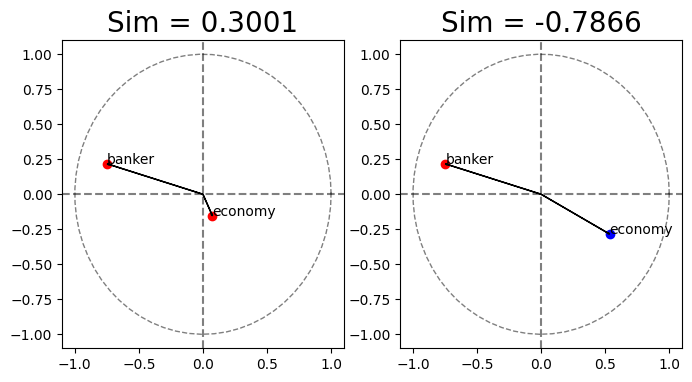

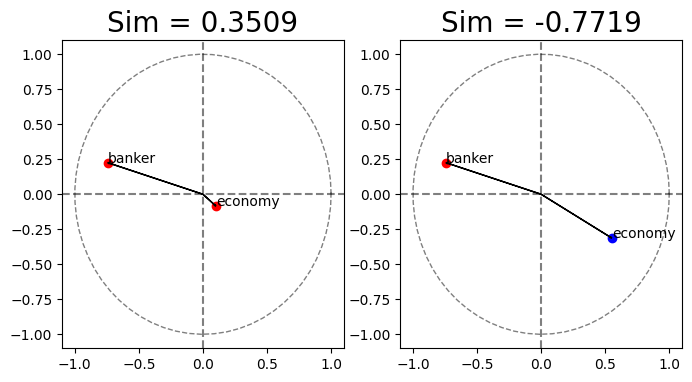

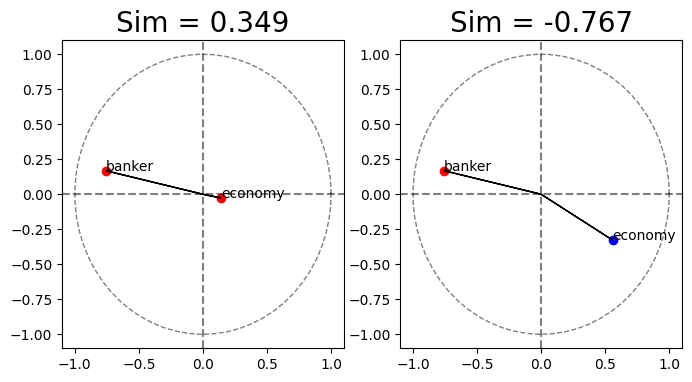

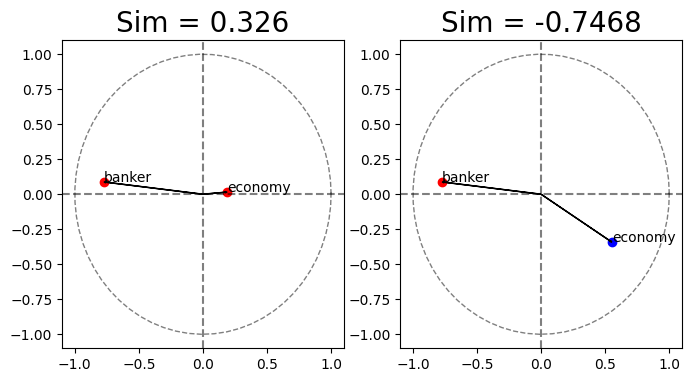

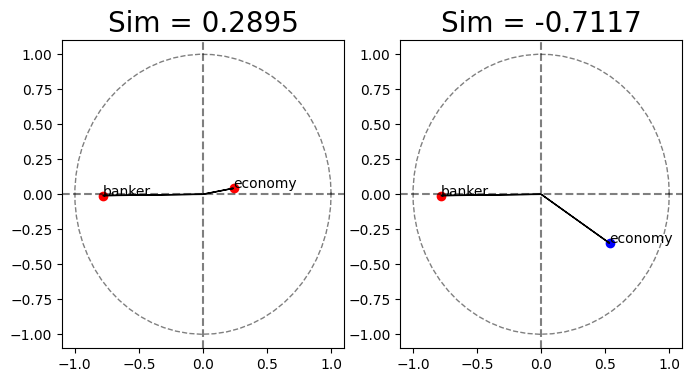

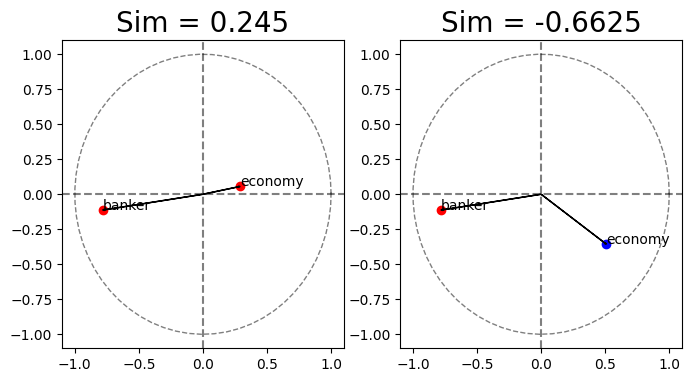

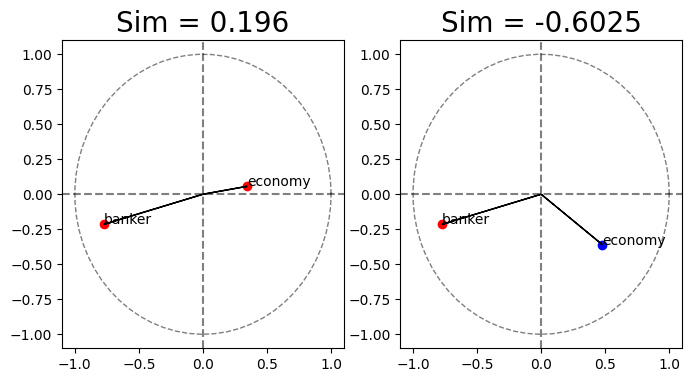

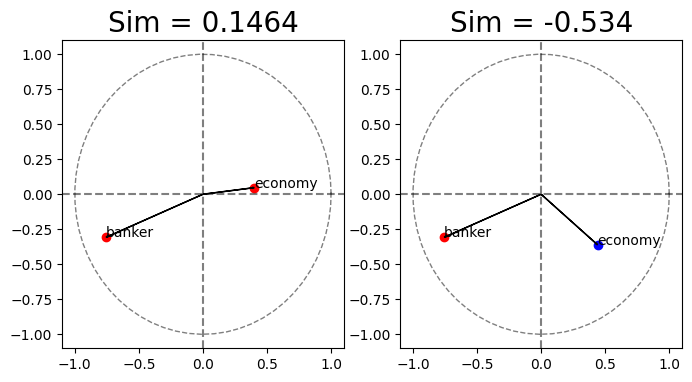

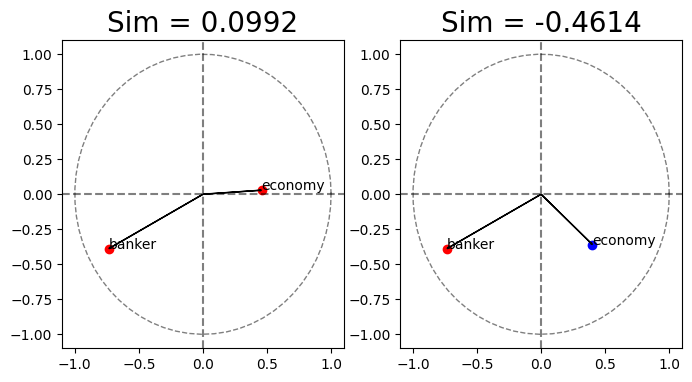

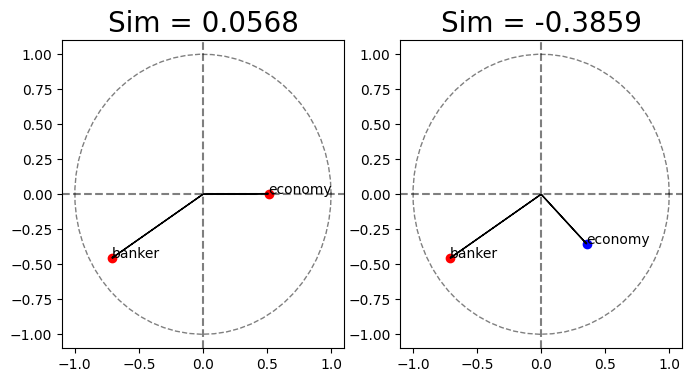

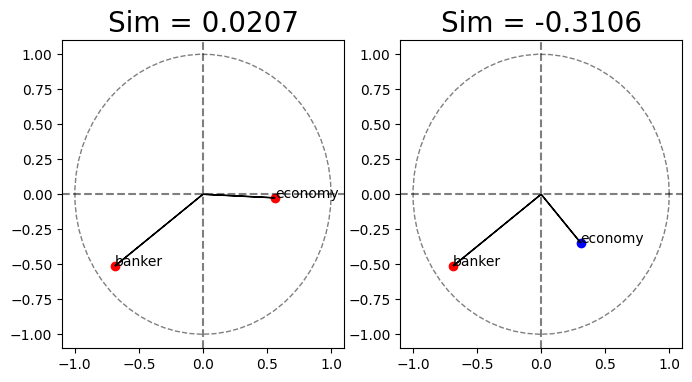

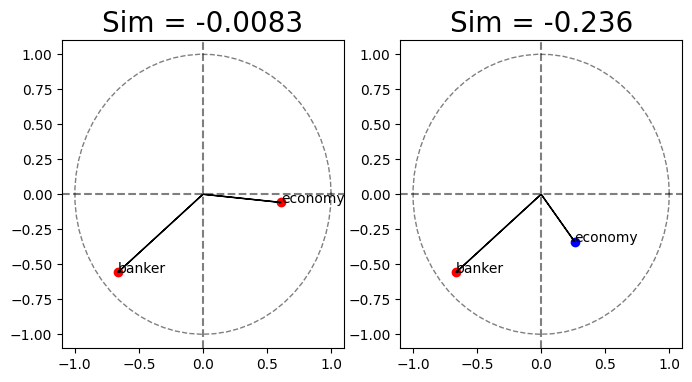

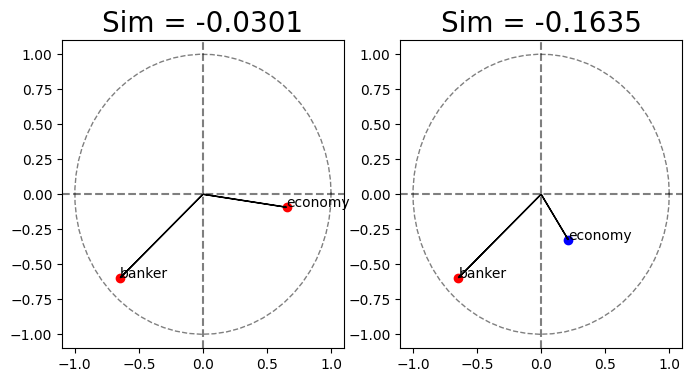

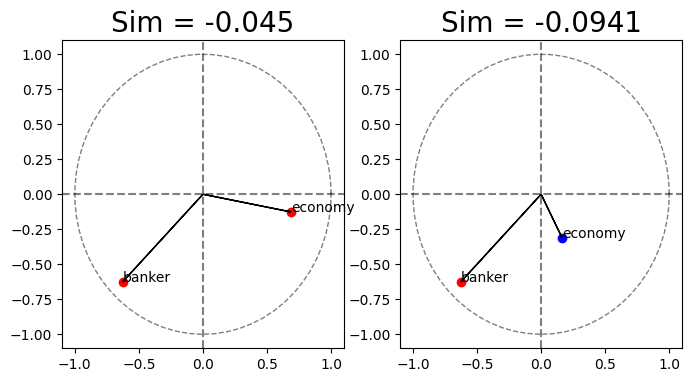

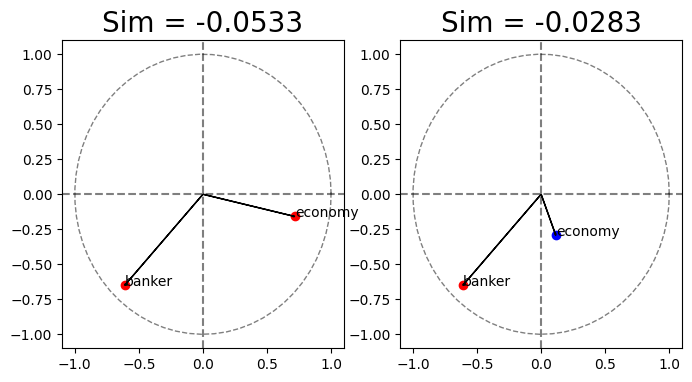

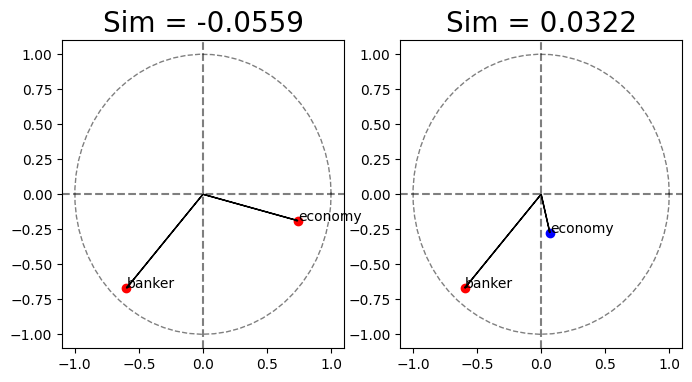

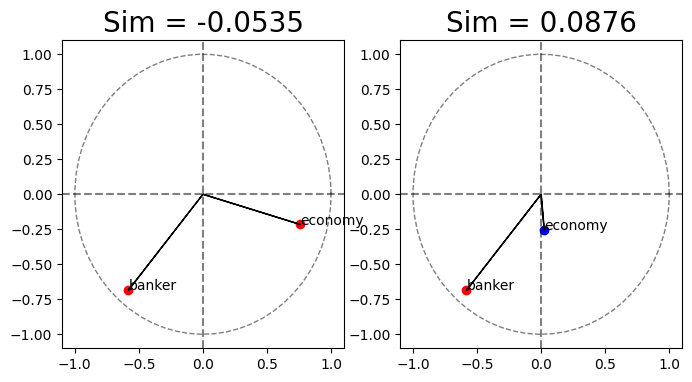

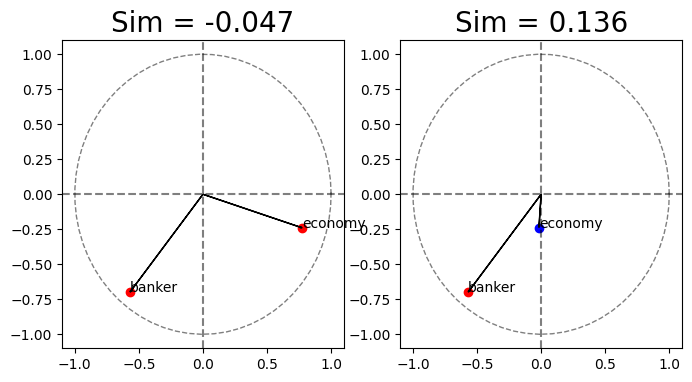

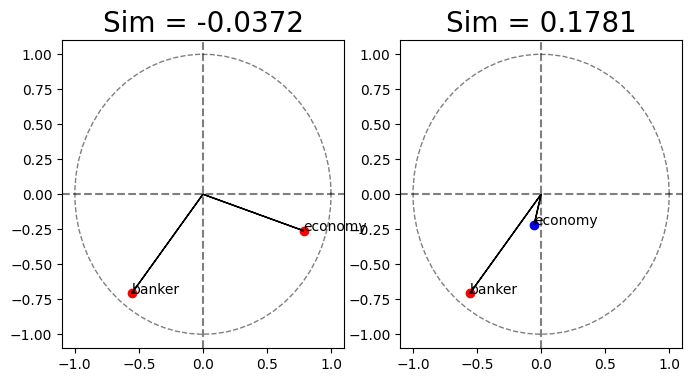

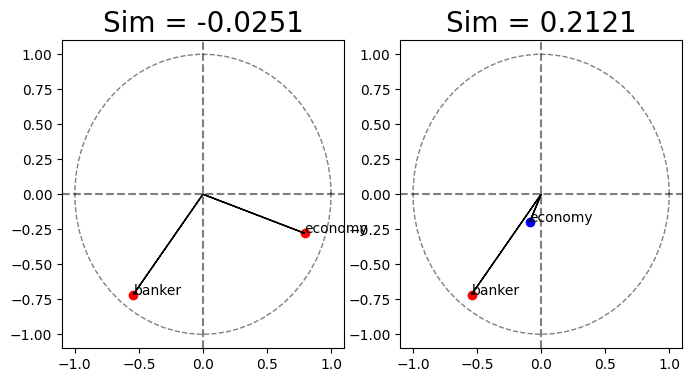

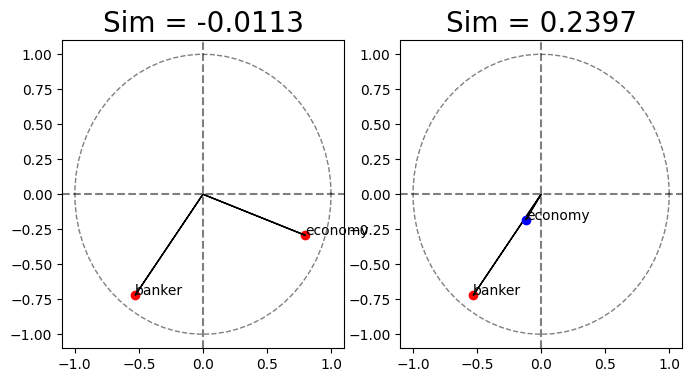

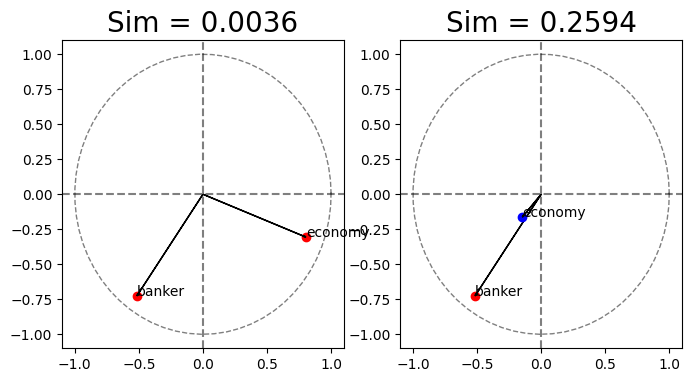

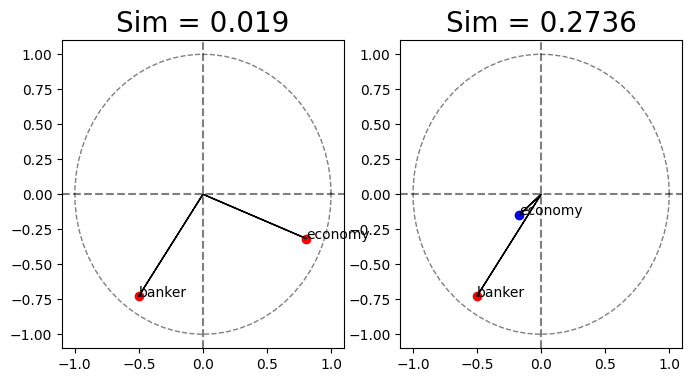

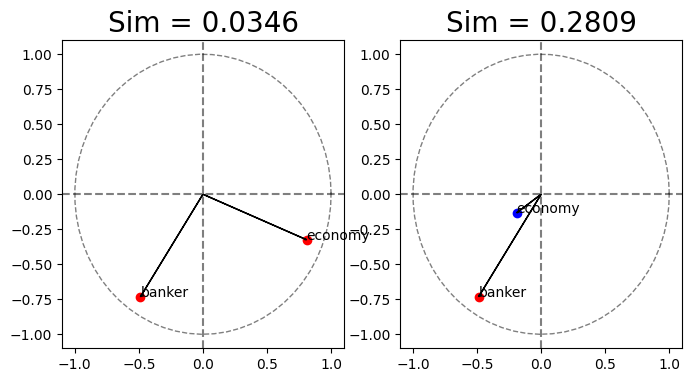

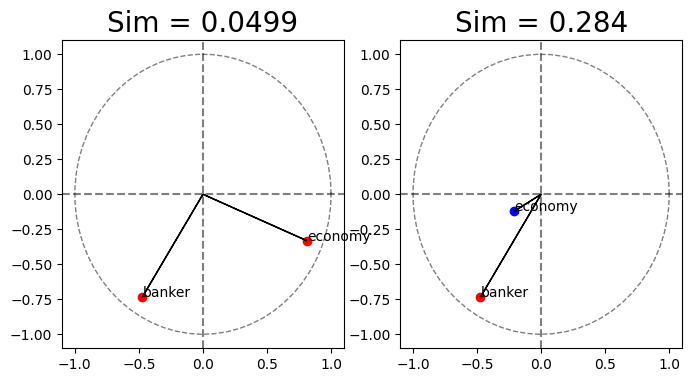

In [36]:
import warnings
warnings.filterwarnings('ignore')

def sigmoid(v, scale=1):
    return 1 / (1 + np.exp(-scale*v))

def update_embeddings(df, main_embeddings, context_embeddings, learning_rate, debug=False):

    # get diff btwn main and corresponding context embedding
    main_embeddings_center = main_embeddings.loc[df.center_word].values
    context_embeddings_context = context_embeddings.loc[df.context_word].values
    diffs = context_embeddings_context - main_embeddings_center

    # get similarities, scores, and errors between main embeddings and ocrresponding context embeddings
    dot_prods = np.sum(main_embeddings_center * context_embeddings_context, axis=1)
    scores = sigmoid(dot_prods)
    errors = (df.label - scores).values.reshape(-1, 1)

    # calculate updates
    updates = diffs*errors*learning_rate
    updates_df = pd.DataFrame(data=updates)
    updates_df['center_word'] = df.center_word
    updates_df['context_word'] = df.context_word
    updates_df_center = updates_df.groupby('center_word').sum()
    updates_df_context = updates_df.groupby('context_word').sum()

    if debug:
        plot_words(debug)

    # apply updates
    main_embeddings += updates_df_center.loc[main_embeddings.index]
    context_embeddings -= updates_df_context.loc[context_embeddings.index]

    # normalize embeddings
    main_embeddings = normalize_data(main_embeddings)
    context_embeddings = normalize_data(context_embeddings)

    # return updated embeddings
    return main_embeddings, context_embeddings


def normalize_data(data):
    row_norms = np.sqrt((data.values**2).sum(axis=1)).reshape(-1,1)
    return data.divide(row_norms, axis='index')



def plot_words(debug):
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    lim_main_first = main_embeddings.loc[[debug[0]]]
    lim_main_second = main_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main_first[0], lim_main_first[1], color='r')
    plt.arrow(0,0,float(lim_main_first[0]), float(lim_main_first[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_first.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_main_second[0], lim_main_second[1], color='r')
    plt.arrow(0,0,float(lim_main_second[0]), float(lim_main_second[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main_second.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], main_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    t = np.arange(0, 3.14*2+0.1, 0.1)
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    ###################################
    
    plt.subplot(1,2,2)
    lim_main = main_embeddings.loc[[debug[0]]]
    lim_context = context_embeddings.loc[[debug[1]]]
    p1 = plt.scatter(lim_main[0], lim_main[1], color='r')
    plt.arrow(0,0,float(lim_main[0]), float(lim_main[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_main.iterrows():
        plt.text(row[0], row[1], str(idx))
    p2 = plt.scatter(lim_context[0], lim_context[1], color='b')
    plt.arrow(0,0,float(lim_context[0]), float(lim_context[1]), head_width=0.01, length_includes_head=True)
    for idx,row in lim_context.iterrows():
        plt.text(row[0], row[1], str(idx))
    sim = 1 - cosine(main_embeddings.loc[debug[0]], context_embeddings.loc[debug[1]])
    plt.title('Sim = %s'%round(sim,4), fontsize=20)
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    plt.show()


EMBEDDING_SIZE = 5

main_embeddings = np.random.normal(0, 0.1, (len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((main_embeddings**2).sum(axis=1)).reshape(-1, 1)
main_embeddings = main_embeddings / row_norms

context_embeddings = np.random.normal(0,0.1,(len(words), EMBEDDING_SIZE))
row_norms = np.sqrt((context_embeddings**2).sum(axis=1)).reshape(-1,1)
context_embeddings = context_embeddings / row_norms

main_embeddings = pd.DataFrame(data=main_embeddings, index=words)
context_embeddings = pd.DataFrame(data=context_embeddings, index=words)
print(article)

for _ in range(25):
    main_embeddings, context_embeddings = update_embeddings(df, main_embeddings, context_embeddings, 0.1, ['banker', 'economy'])

In [35]:
main_embeddings

,0,1,2,3,4
abandoned,0.289176,-0.121589,0.056297,0.820625,0.474340
absolute,0.643143,0.147687,0.503957,-0.210893,0.515856
action,-0.700123,0.116757,-0.203113,0.566315,0.366372
actual,0.755001,0.169125,0.407373,-0.159151,0.458355
additional,-0.291322,-0.019534,0.477493,0.662016,-0.498483
...,...,...,...,...,...
worst,-0.498475,-0.719667,-0.422337,0.229555,-0.050378
wowing,0.082474,0.501688,-0.047597,0.744282,0.430448
wrong,-0.349972,-0.399527,0.230284,0.136251,0.803929
year,-0.345391,0.684544,-0.220064,0.535245,-0.277831


In [27]:
context_embeddings

,0,1,2,3,4
abandoned,-0.508408,-0.137904,0.728412,0.434390,0.056798
absolute,0.311052,-0.074059,0.768911,0.218446,0.508743
action,0.630907,0.093842,-0.368836,0.675361,-0.031575
actual,0.240310,-0.299731,0.170882,0.806908,0.414864
additional,-0.191647,0.310463,-0.303539,-0.876856,-0.076623
...,...,...,...,...,...
worst,0.274157,-0.241754,0.055508,0.643796,0.669954
wowing,0.005330,0.105927,-0.271523,0.349056,0.890610
wrong,0.524907,-0.394397,-0.504981,-0.549839,0.107680
year,-0.176362,-0.638288,-0.231381,-0.355018,-0.617989


In [28]:
L = []
for w1 in words:
    for w2 in words:
        if w1 != w2:
            sim = 1- cosine(main_embeddings.loc[w1], main_embeddings.loc[w2])
            L.append((w1, w2, sim))

sorted([item for item in L if item[0] == 'banker'], key = lambda t: -t[2])[:10]

[('banker', 'placing', 0.9896838288868578),
 ('banker', 'backtrack', 0.9253570802052927),
 ('banker', 'easy', 0.919295012493656),
 ('banker', 'com', 0.9101696902909009),
 ('banker', 'economy', 0.8942957381407136),
 ('banker', 'british', 0.8687383507274806),
 ('banker', 'express', 0.8591235649869148),
 ('banker', 'influence', 0.8509596605541009),
 ('banker', 'ecb', 0.8417738319053979),
 ('banker', 'interval', 0.8263823903441649)]

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
transf_embeddings = pca.fit_transform(main_embeddings.values)
words_used = main_embeddings.index

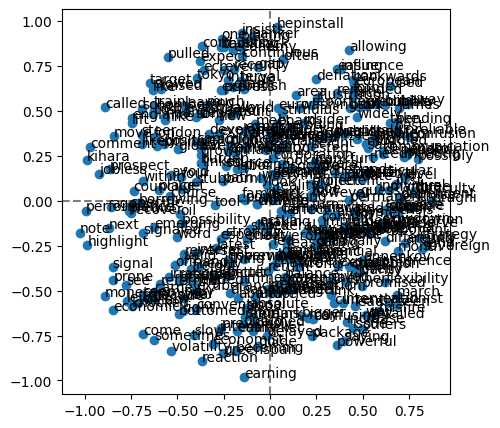

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(transf_embeddings[:,0], transf_embeddings[:,1])
for idx,row in enumerate(transf_embeddings):
    plt.text(row[0], row[1], str(words_used[idx]))
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)

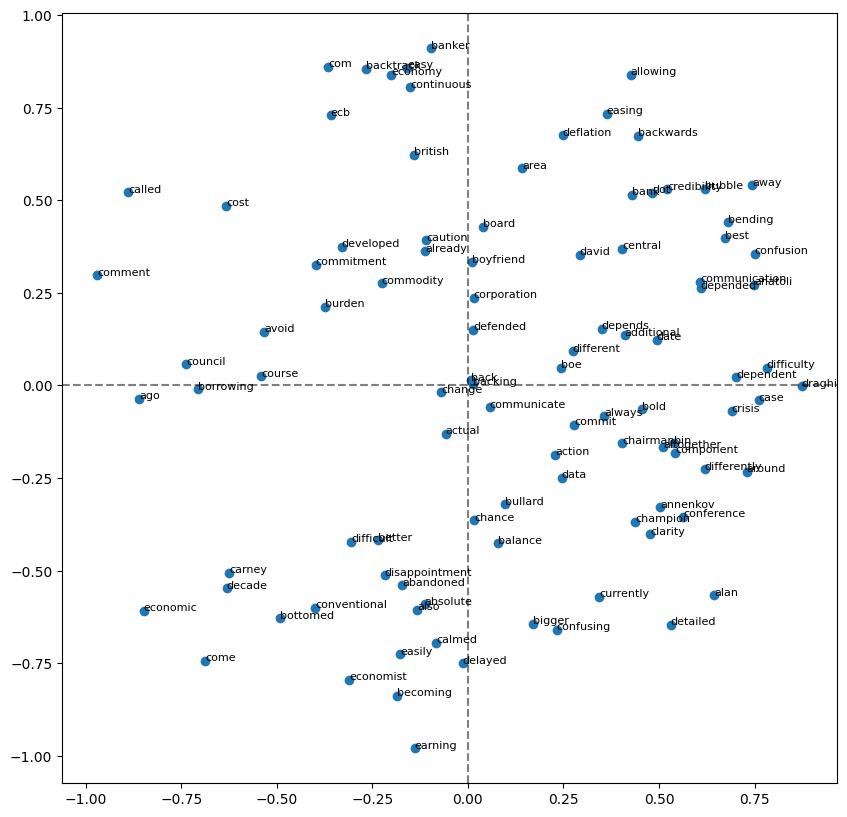

In [31]:
top_n = 100  # or however many words you want to visualize

# Check the mapping consistency between words and embeddings
assert len(words_used) == transf_embeddings.shape[0], "Mismatch in words and embeddings!"

filtered_words = words_used[:top_n]
filtered_embeddings = transf_embeddings[:top_n]

plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings[:, 0], filtered_embeddings[:, 1])

for idx, row in enumerate(filtered_embeddings):
    plt.text(row[0], row[1], str(filtered_words[idx]), fontsize=8)
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
plt.show()


In [40]:
print(words_used[:10])

Index(['aaa', 'aabb', 'aabr', 'aac', 'aaf', 'aah', 'aahs', 'aakash', 'aal',
       'aaliyah'],
      dtype='object')


In [41]:
print(transf_embeddings[:10, :])

[[ 0.32424111 -0.12284369]
 [ 0.2491091  -0.21340827]
 [ 0.80291411  0.08411084]
 [ 0.06976509 -0.61440689]
 [ 0.50068632  0.01372227]
 [-0.63951003 -0.50163941]
 [ 0.63645674  0.60703029]
 [ 0.73506571  0.43083509]
 [-0.35664751 -0.45757961]
 [-0.48477568 -0.35296156]]
